- dataset
https://www.kaggle.com/competitions/playground-series-s4e1/data
- 참고
https://velog.io/@tngus0325/%EA%B3%A0%EA%B0%9D-%EC%9D%B4%ED%83%88-%EC%98%88%EB%B0%A9%EC%9D%84-%EC%9C%84%ED%95%9C-%EC%9D%B4%ED%83%88-%EA%B3%A0%EA%B0%9D-%EB%B6%84%EC%84%9D-%EB%B0%8F-%EB%8C%80%EC%95%88%EC%B1%85-%EC%88%98%EB%A6%BD#1-%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8-%EB%AA%A9%ED%91%9C

In [49]:
import pandas as pd
train = pd.read_csv('./train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- Data Description
    - Customer ID: A unique identifier for each customer
    - Surname: The customer's surname or last name
    - Credit Score: A numerical value representing the customer's credit score (신용점수)
    - Geography: The country where the customer resides (고객이 거주하는 국가)
    - Gender: The customer's gender
    - Age: The customer's age.
    - Tenure: The number of years the customer has been with the bank (가입한 지 얼마나 됐는지?)
    - Balance: The customer's account balance (잔액)
    - NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
    - HasCrCard: Whether the customer has a credit card (신용카드 보유여부)
    - IsActiveMember: Whether the customer is an active member (활성회원 여부)
    - EstimatedSalary: The estimated salary of the customer (예상급여)
    - Exited: Whether the customer has churned (Target Variable) (이탈여부)

In [50]:
# Descriptive statistics for all data
continuous_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
train[continuous_var].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Tenure,165034.0,5.020353,2.806159,0.00,3.00,5.0,7.0000,10.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
NumOfProducts,165034.0,1.554455,0.547154,1.00,1.00,2.0,2.0000,4.00
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48


In [51]:
# Descriptive statistics of churn
train.loc[train['Exited']==1,continuous_var].describe().T # 이탈한 고객만 필터링

,count,mean,std,min,25%,50%,75%,max
CreditScore,34921.0,652.220469,81.136331,350.00,593.00,651.00,708.00,850.00
Age,34921.0,43.958478,9.004380,18.00,38.00,44.00,50.00,92.00
Tenure,34921.0,4.914378,2.826564,0.00,3.00,5.00,7.00,10.00
Balance,34921.0,71209.978085,62646.691947,0.00,0.00,98955.87,125437.14,238387.56
NumOfProducts,34921.0,1.327854,0.661912,1.00,1.00,1.00,1.00,4.00
EstimatedSalary,34921.0,114402.496656,50542.030878,11.58,74965.44,120892.96,158750.53,199992.48


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2098310547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Geography', data=train, palette='viridis')


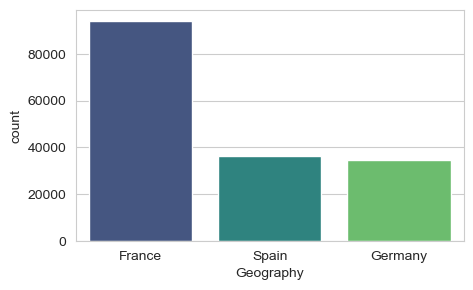

In [52]:
# Number of customers per country
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Geography', data=train, palette='viridis')


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\953147494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=train, palette='Set1')


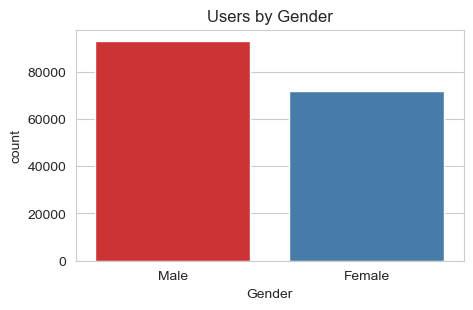

In [53]:
# Customer distribution by gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', data=train, palette='Set1')
plt.title('Users by Gender')
plt.xlabel('Gender')
plt.show()

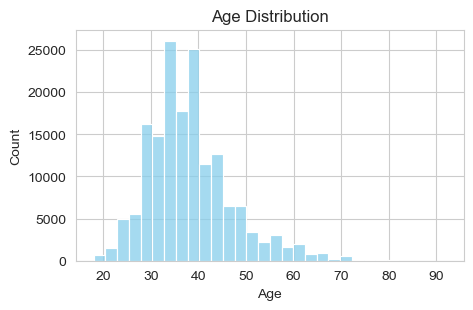

In [54]:
# Customer distribution by age
plt.figure(figsize=(5, 3))
sns.histplot(train['Age'], bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

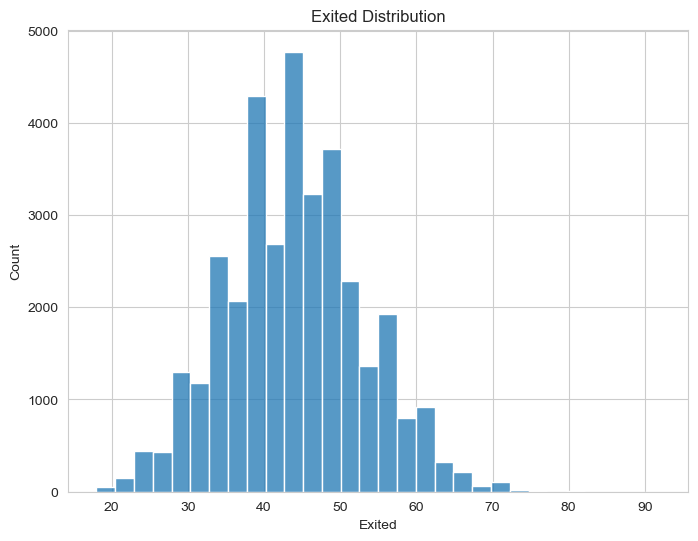

In [55]:
# Distribution of churn by age (이탈한 고객의 나이!)
exited = train.loc[train['Exited']==1,:]

plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=exited, bins=30)
plt.title('Exited Distribution')
plt.xlabel('Exited')
plt.show()

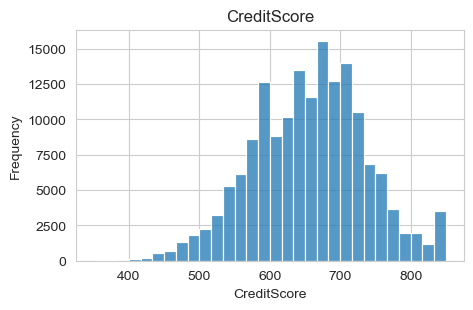

In [56]:
# Credit score distribution
"""이 데이터셋의 CreditScore는 **FICO 스타일 점수(300~850)**라고 생각하면 되고,
높을수록 신용도가 높고, 낮을수록 이탈 가능성이 커질 수도 있는 특징 중 하나로 분석"""
plt.figure(figsize=(5, 3))
sns.histplot(train['CreditScore'], bins=30)
plt.title('CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

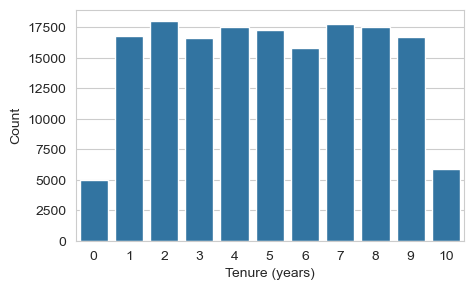

In [57]:
# Tenure distribution
plt.figure(figsize=(5, 3))
sns.countplot(x='Tenure', data=train)
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

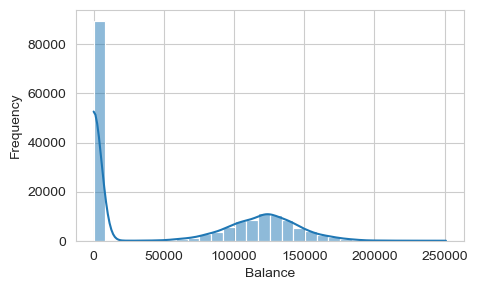

In [58]:
# Balance distribution
plt.figure(figsize=(5, 3))
sns.histplot(train['Balance'], bins=30, kde=True)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show() # 0인 고객이 너무 많음

- 잔액이 0인 고객이 상당수(전체의 45.67%) 있는데, 이는 분석에 영향을 미칠 수 있으므로 제외했습니다.

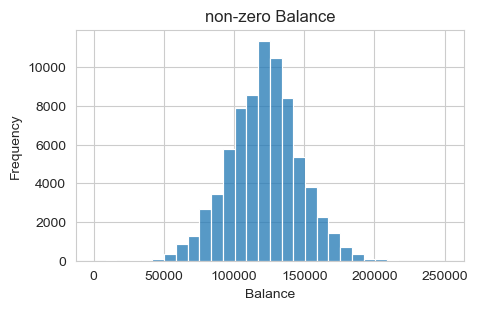

In [59]:
# Data excluding zero balances
data = train.drop(['id', 'CustomerId', 'Surname', 'Geography'], axis=1)

data_ybal = data.loc[data['Balance'] != 0, :]
data.shape[0]
data_ybal.shape[0]

plt.figure(figsize=(5, 3))
sns.histplot(data_ybal['Balance'], bins=30)
plt.title('non-zero Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

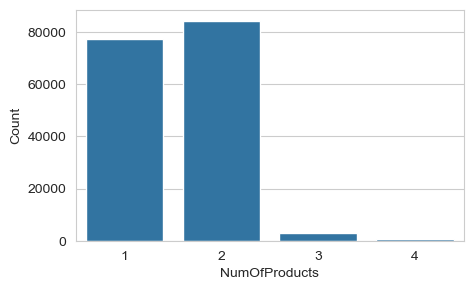

In [60]:
# Distribution of the number of products used
plt.figure(figsize=(5, 3))
sns.countplot(x='NumOfProducts', data=train)
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show() 

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\3755297980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HasCrCard', data=train, palette='cool')


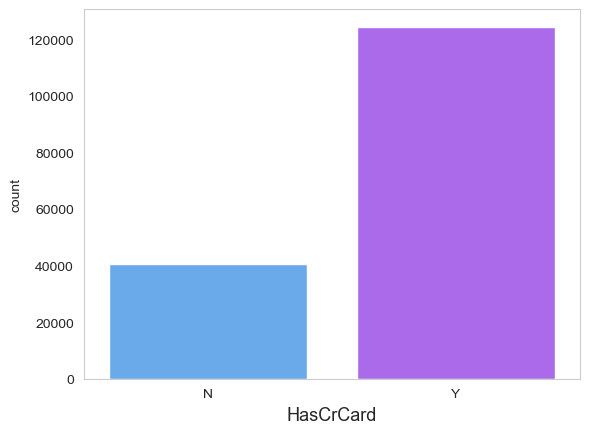

In [61]:
# Distribution of customers with credit cards
sns.countplot(x='HasCrCard', data=train, palette='cool')

plt.grid(axis='y')
plt.xlabel('HasCrCard', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\1811887223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsActiveMember', data=train, palette='cool')


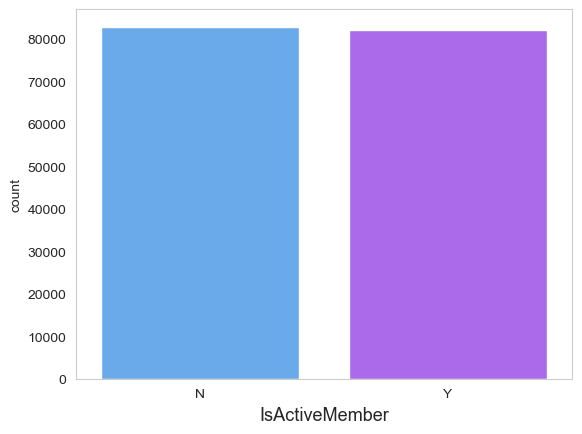

In [62]:
# Active member distribution
sns.countplot(x='IsActiveMember', data=train, palette='cool')

plt.grid(axis='y')
plt.xlabel('IsActiveMember', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

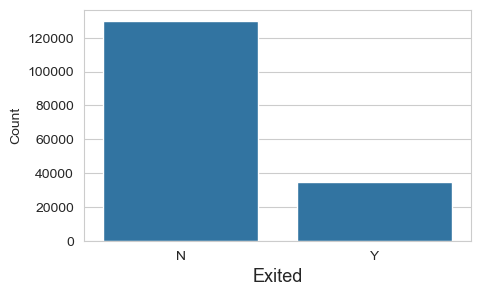

In [63]:
# Number of churned members 
plt.figure(figsize=(5, 3))
sns.countplot(x='Exited', data=data)
plt.xlabel('Exited', fontsize=13)
plt.xticks([0, 1], ['N', 'Y'])
plt.ylabel('Count')
plt.show() # 탈퇴자는 기존 회원의 1/4 규모입니다.

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\3924111365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')


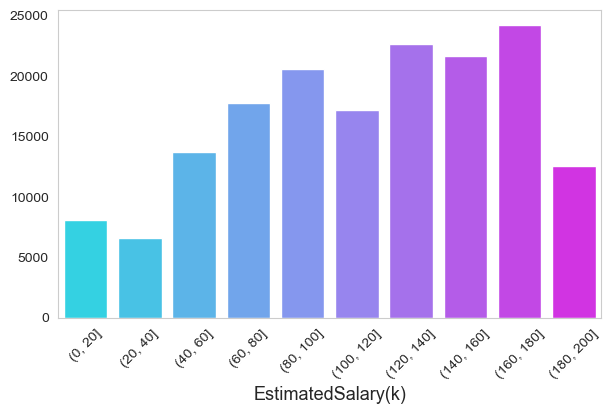

In [64]:
# Estimated salary distribution
# Show in thousands
train.loc[:, 'EstimatedSalary_thousands'] = train['EstimatedSalary'] / 1000

salary_bins = pd.cut(train['EstimatedSalary_thousands'], bins=[0,20,40,60,80,100,120,140,160,180,200])
salary_bin_counts = salary_bins.value_counts().sort_index()

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=salary_bin_counts.index.astype(str), y=salary_bin_counts.values, palette='cool')

plt.xticks(rotation=45)
plt.xlabel('EstimatedSalary(k)', fontsize=13)
plt.grid(axis='y')
plt.show() # 고객의 Estimated Salary(예상 연봉) 분포를 **천 단위(단위: 1,000)**로 바꾸고, 그걸 구간별로 나눠서 막대그래프로 시각화

- 우리는 특정 연령대에서 상당한 이탈이 감지되면 해당 연령대를 타겟으로 삼기로 결정했습니다.

In [65]:
# Calculate churn rate by age group 나이 그룹별 이탈률(churn rate)**을 계산 / 각 연령대별로 이탈율 도출출
def create_age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age < 70:
        return '60s'
    else:
        return '70s up'

train['AgeGroup'] = train['Age'].apply(create_age_group) # AgeGroup 컬럼을 새로 만들어서 각 고객의 나이에 맞는 연령대 그룹을 할당

AgeGroup = ['10s', '20s', '30s', '40s', '50s', '60s', '70s up']
for i in AgeGroup:
    AgeExited = train.loc[(train['AgeGroup'] == i) & (train['Exited'] == 1) , :].shape[0] 
    AgeData = train.loc[train['AgeGroup'] == i].shape[0]
    print(i, round(AgeExited / AgeData, 3))

10s 0.102
20s 0.083
30s 0.108
40s 0.348
50s 0.609
60s 0.388
70s up 0.164


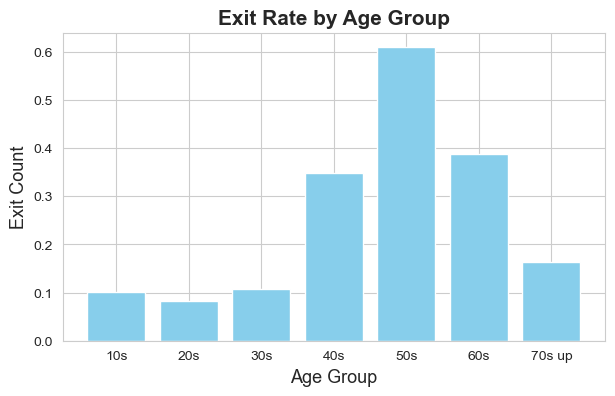

In [66]:
# Visualize churn rate by age group
AgeGroup = ['10s', '20s', '30s', '40s', '50s', '60s', '70s up']
AgeExitRates = []

for i in AgeGroup:
    AgeExited = train.loc[(train['AgeGroup'] == i) & (train['Exited'] == 1) , :].shape[0]
    AgeData = train.loc[train['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    AgeExitRates.append(exit_rate)


plt.figure(figsize=(7, 4))
plt.bar(AgeGroup, AgeExitRates, color='skyblue')
plt.title('Exit Rate by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Exit Count', fontsize=13)
plt.show()

In [67]:
# 기존 계산 단계에서 이렇게 저장 (위에 코드 비효율적이라 바꿈)
exit_rate_dict = {}

for i in AgeGroup:
    AgeExited = train.loc[(train['AgeGroup'] == i) & (train['Exited'] == 1), :].shape[0]
    AgeData = train.loc[train['AgeGroup'] == i].shape[0]
    exit_rate = round(AgeExited / AgeData, 3) if AgeData > 0 else 0
    exit_rate_dict[i] = exit_rate


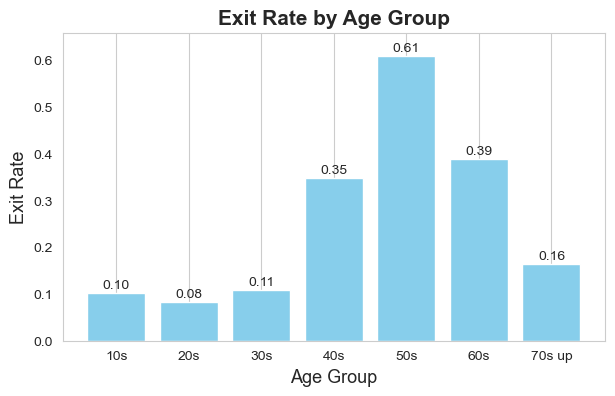

In [68]:
plt.figure(figsize=(7, 4))
plt.bar(exit_rate_dict.keys(), exit_rate_dict.values(), color='skyblue')
plt.title('Exit Rate by Age Group', fontsize=15, fontweight='bold')
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Exit Rate', fontsize=13)
plt.ylim(0, max(exit_rate_dict.values()) + 0.05)
plt.grid(axis='y')

# 그래프 위에 수치 표시
for i, (group, rate) in enumerate(exit_rate_dict.items()):
    plt.text(i, rate + 0.01, f"{rate:.2f}", ha='center', fontsize=10)

plt.show()


50대는 전체 고객 중 이탈률이 가장 높기 때문에 타겟 고객으로 설정했습니다.
타겟 고객에 대한 심층 분석을 수행하세요.
앞서 데이터를 검토했을 때 잔액이 0인 데이터의 비율이 높았는데, 이는 분석에 영향을 미칠 수 있다고 판단되어 잔액이 0인 데이터를 심층 분석에서 제외했습니다.

Target group: 50s & non-zero balance customers

In [69]:
# Non-zero balance customers 전체 고객 수와 잔액이 0이 아닌 고객 수를 비교
data_ybal = data.loc[data['Balance'] != 0, :] # Balance가 0이 아닌 행들만 추출
data.shape[0]
data_ybal.shape[0]

print(f"전체 고객 수: {data.shape[0]}")
print(f"잔액이 0이 아닌 고객 수: {data_ybal.shape[0]}")
print(f"잔액이 0인 고객 수: {data.shape[0] - data_ybal.shape[0]}")


전체 고객 수: 165034
잔액이 0이 아닌 고객 수: 75386
잔액이 0인 고객 수: 89648


In [70]:
data_ybal['AgeGroup'] = pd.cut(
    data_ybal['Age'],                             # 나이 컬럼 기준
    bins=[10, 20, 30, 40, 50, 60, 70, 100],       # 나이 구간 설정
    labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s up'],  # 각 구간에 이름 부여
    include_lowest=True,                         # 가장 낮은 구간 포함 (10세 포함)
    right=False                                  # 오른쪽 경계 포함하지 않음 → [10,20)
)
data_ybal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75386 entries, 3 to 165032
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      75386 non-null  int64   
 1   Gender           75386 non-null  object  
 2   Age              75386 non-null  float64 
 3   Tenure           75386 non-null  int64   
 4   Balance          75386 non-null  float64 
 5   NumOfProducts    75386 non-null  int64   
 6   HasCrCard        75386 non-null  float64 
 7   IsActiveMember   75386 non-null  float64 
 8   EstimatedSalary  75386 non-null  float64 
 9   Exited           75386 non-null  int64   
 10  AgeGroup         75386 non-null  category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 6.4+ MB


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\460535136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ybal['AgeGroup'] = pd.cut(


In [71]:
# Customers in their 50s
data_ybal_50 = data_ybal.loc[data_ybal['AgeGroup'] == '50s', :]

In [72]:
# Drop 'AgeGroup' as all customers of data_ybal_50 are in their 50s
data_ybal_50.drop('AgeGroup', axis=1, inplace=True) # 원본을 직접 수정

dy5 = data_ybal_50 # dy5라는 새 변수에 50대 고객 데이터 복사 (참조 형식)
dy5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6782 entries, 18 to 165026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      6782 non-null   int64  
 1   Gender           6782 non-null   object 
 2   Age              6782 non-null   float64
 3   Tenure           6782 non-null   int64  
 4   Balance          6782 non-null   float64
 5   NumOfProducts    6782 non-null   int64  
 6   HasCrCard        6782 non-null   float64
 7   IsActiveMember   6782 non-null   float64
 8   EstimatedSalary  6782 non-null   float64
 9   Exited           6782 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 582.8+ KB


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\891639016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ybal_50.drop('AgeGroup', axis=1, inplace=True) # 원본을 직접 수정


In [73]:
# !pip install pingouin R의 stats나 psych 패키지 같은 느낌으로, 간편하게 고급 통계분석을 할 수 있게 도와주는 도구

In [74]:
# Correlation coefficient and p-value (피어슨 상관계수와 p-value 계산)
import pingouin as pg
table = pg.rcorr(dy5, stars=False)
print(table)

                CreditScore     Age  Tenure Balance NumOfProducts HasCrCard  \
CreditScore               -   0.181   0.993   0.704         0.361     0.984   
Age                  -0.016       -   0.682   0.181         0.540     0.447   
Tenure                 -0.0   0.005       -   0.431         0.238     0.886   
Balance               0.005   0.016    0.01       -         0.255     0.208   
NumOfProducts         0.011  -0.007   0.014  -0.014             -     0.480   
HasCrCard              -0.0  -0.009  -0.002   0.015        -0.009         -   
IsActiveMember        0.028   0.097   -0.01  -0.014         0.013    -0.046   
EstimatedSalary      -0.007  -0.037   0.014   0.005         0.006     0.025   
Exited                -0.01  -0.057  -0.022   0.012        -0.014     0.023   

                IsActiveMember EstimatedSalary Exited  
CreditScore              0.021           0.591  0.406  
Age                      0.000           0.003  0.000  
Tenure                   0.421           

🔍 해석 방법
r (correlation coefficient): -1 ~ 1 사이

1에 가까울수록 강한 양의 상관관계

-1에 가까울수록 강한 음의 상관관계

0에 가까울수록 거의 상관 없음

p-val (p-value): 유의성 판단용

보통 기준: p < 0.05 → 유의미한 상관관계

p < 0.01 → 아주 유의미

p ≥ 0.05 → 통계적으로 유의미하지 않음 (우연일 수 있음)

In [75]:
r_table = pg.rcorr(dy5)
# 상관계수만 추출
r_values = r_table.iloc[0::2, :]  # 짝수번째 행 (상관계수)
# p-value만 추출
p_values = r_table.iloc[1::2, :]  # 홀수번째 행 (p-value)

print("📊 상관계수 (r):")
print(r_values)

print("\n📉 p-value:")
print(p_values)


📊 상관계수 (r):
               CreditScore     Age  Tenure Balance NumOfProducts HasCrCard  \
CreditScore              -                                                   
Tenure                -0.0   0.005       -                                   
NumOfProducts        0.011  -0.007   0.014  -0.014             -             
IsActiveMember       0.028   0.097   -0.01  -0.014         0.013    -0.046   
Exited               -0.01  -0.057  -0.022   0.012        -0.014     0.023   

               IsActiveMember EstimatedSalary Exited  
CreditScore                 *                         
Tenure                                                
NumOfProducts                                         
IsActiveMember              -                    ***  
Exited                 -0.407            0.06      -  

📉 p-value:
                CreditScore     Age  Tenure Balance NumOfProducts HasCrCard  \
Age                  -0.016       -                                           
Balance            

<Axes: >

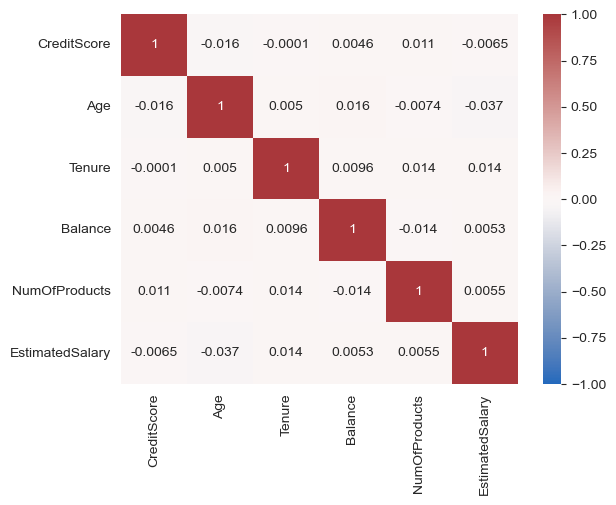

In [76]:
# Correlation visualization
corr = dy5[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()

import seaborn as sns
sns.heatmap(corr, vmin=-1, vmax=1, cmap='vlag', annot=True)

In [77]:
dy5[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,6782.0,654.663963,81.552685,350.00,595.0000,653.000,711.0000,850.00
Age,6782.0,53.715128,2.850490,50.00,51.0000,53.000,56.0000,59.00
Tenure,6782.0,4.903716,2.836032,0.00,2.0000,5.000,7.0000,10.00
Balance,6782.0,122206.935370,24140.105111,3768.69,106929.4125,122217.105,137236.1375,238387.56
NumOfProducts,6782.0,1.316278,0.618806,1.00,1.0000,1.000,1.0000,4.00
EstimatedSalary,6782.0,113112.765506,50729.000683,11.58,73681.3800,119330.745,157391.9625,199775.67


In [78]:
train['AgeGroup'].value_counts()

AgeGroup
30s       81253
40s       43319
20s       23202
50s       12186
60s        3920
70s up      822
10s         332
Name: count, dtype: int64

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\1157469792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Geography', data=dy5_0, palette='cool')


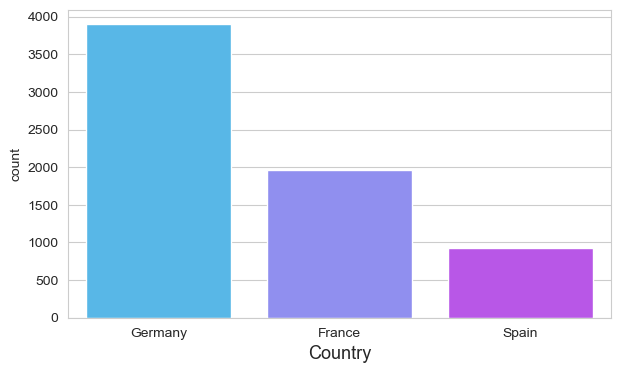

In [79]:
# 50대 고객 중 잔액이 0이 아닌 고객들(dy5_0)의 국가별 분포를 시각화

dy5_0 = train.loc[(train['AgeGroup']=='50s') & (train['Balance']!=0)]

# Geographic distribution of 50 customers 
plt.figure(figsize=(7, 4))
new_x_labels = ['Germany', 'France', 'Spain']
ax = sns.countplot(x='Geography', data=dy5_0, palette='cool')

plt.xlabel('Country', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)  

plt.show()

프랑스는 전반적으로 가장 흔한 고객이지만, 독일은 50대가 가장 많습니다.
독일은 40대 고객도 가장 많습니다.
하지만 이탈률 또한 독일에서 가장 높습니다.
프랑스: 이탈률 약 48.6%, 유지율 약 51.4%
독일: 이탈률 약 75.9%, 유지율 약 24.1%
스페인: 이탈률 약 51.5%, 유지율 약 48.5%

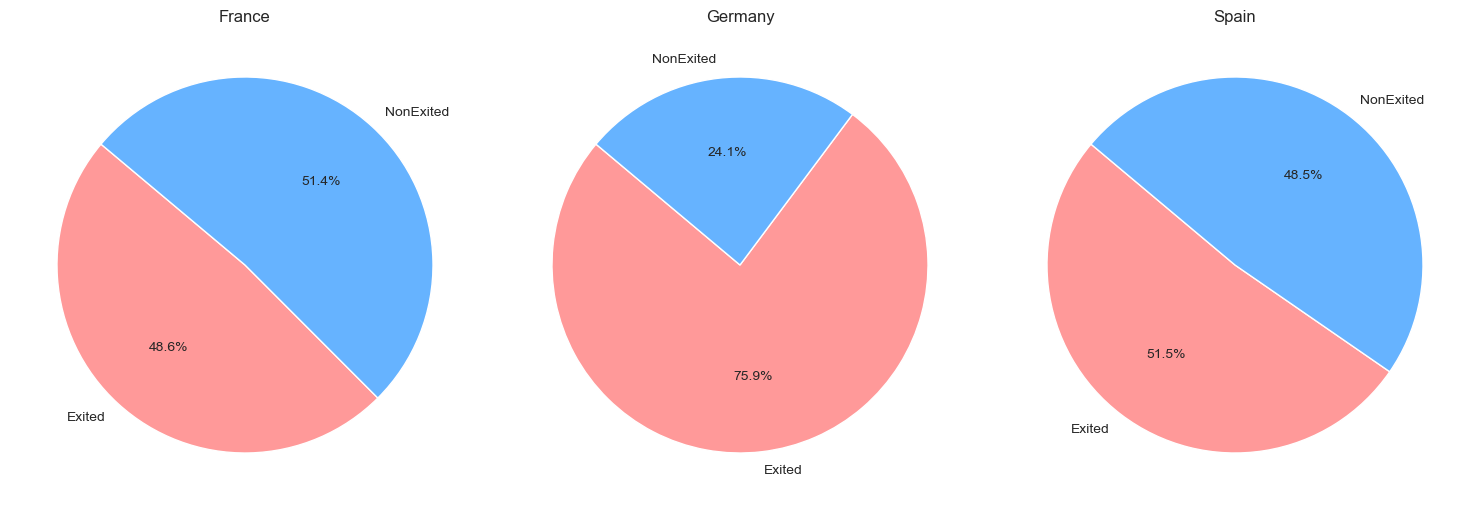

In [80]:
labels = ['Exited', 'Stayed']
france_sizes = [48.6, 51.4]  
germany_sizes = [75.9, 24.1] 
spain_sizes = [51.5, 48.5] 
colors = ['#ff9999','#66b3ff'] 

# Generating pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart of France
axs[0].pie(france_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].set_title('France')

# Pie chart of Germany
axs[1].pie(germany_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Germany')

# Pie chart of Spain
axs[2].pie(spain_sizes, labels=['Exited', 'NonExited'], colors=colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Spain')

plt.tight_layout()
plt.show()

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2849999487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=dy5_0, palette=['#6EACE6', '#FD78BB'])


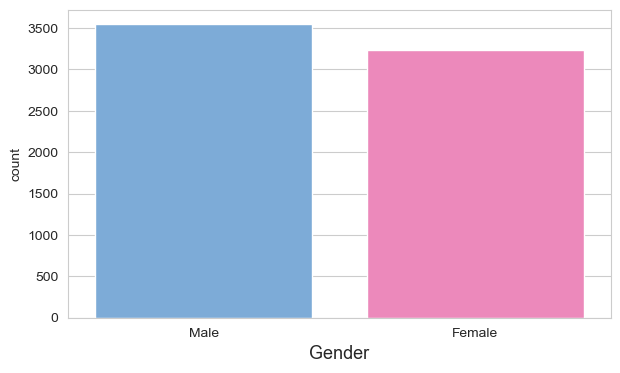

In [81]:
# 50s Gender Distribution
plt.figure(figsize=(7, 4))
new_x_labels = ['Male', 'Female']
ax = sns.countplot(x='Gender', data=dy5_0, palette=['#6EACE6', '#FD78BB'])

plt.xlabel('Gender', fontsize=13)
plt.xticks(range(len(new_x_labels)), new_x_labels)
sns.set_style("whitegrid")
plt.show()


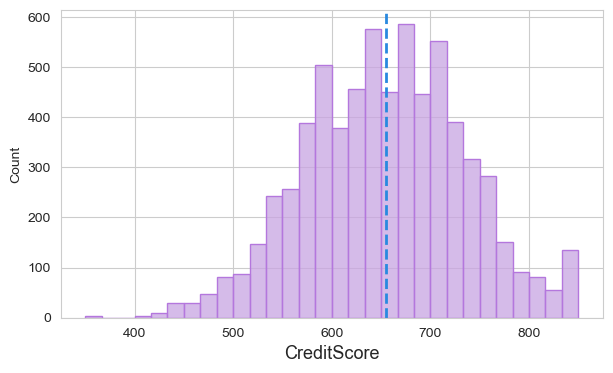

In [82]:
# Credit score distribution in the 50s
plt.figure(figsize=(7, 4))
sns.histplot(dy5_0['CreditScore'], bins=30, color='#C8A4E2', edgecolor='#B477DD')

# Average line
plt.axvline(dy5_0['CreditScore'].mean(), color='#2989DF', linestyle='dashed', linewidth=2)

# Details
plt.xlabel('CreditScore', fontsize=13)
plt.grid(True)

plt.show()

전체 고객 분포와 크게 다르지 않음

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2693321200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Tenure', data=dy5_0, palette='cool')


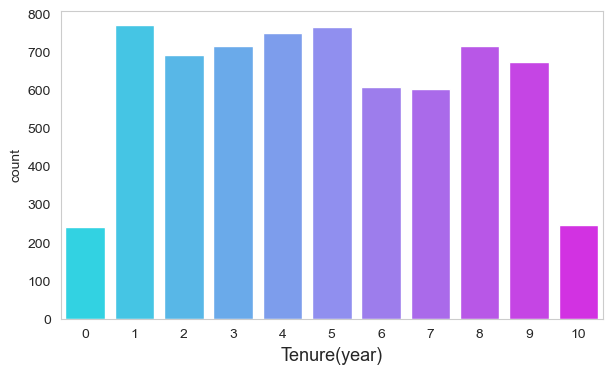

In [83]:
# Tenure Distribution
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Tenure', data=dy5_0, palette='cool')
plt.xlabel('Tenure(year)', fontsize=13)
plt.grid(axis='y')
plt.show()

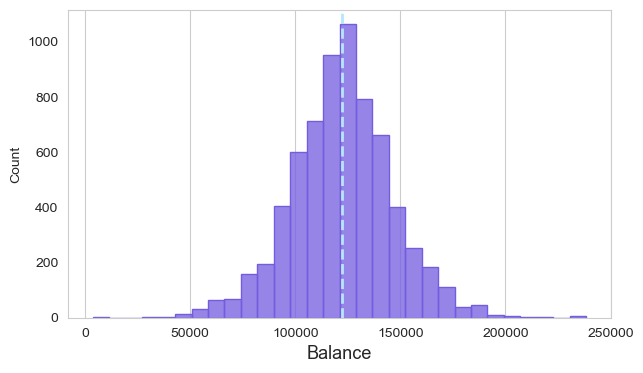

In [84]:
# Balance distribution for customers with balances
plt.figure(figsize=(7, 4))
sns.histplot(dy5_0['Balance'], bins=30, color='#735CE0', edgecolor='#735CE0')

plt.axvline(dy5_0['Balance'].mean(), color='#B6E7FD', linestyle='dashed', linewidth=2)
plt.xlabel('Balance', fontsize=13)
plt.grid(axis='y')
plt.show()

평균 잔액: 122206.94달러


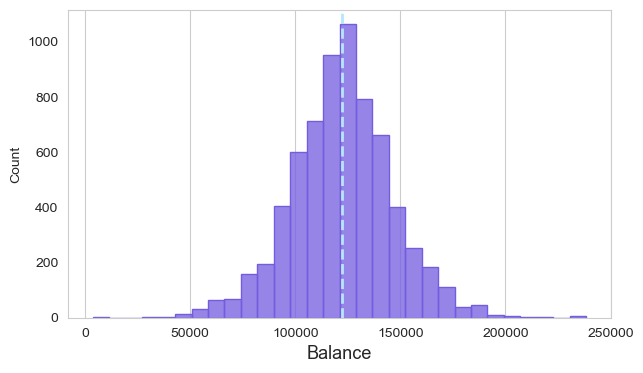

In [85]:
# Balance distribution for customers with balances
plt.figure(figsize=(7, 4))
sns.histplot(dy5_0['Balance'], bins=30, color='#735CE0', edgecolor='#735CE0')

# Calculate and print the average balance
mean_balance = dy5_0['Balance'].mean()
print(f"평균 잔액: {mean_balance:.2f}달러")  # 소수점 둘째 자리까지 출력

# Add a vertical line at the mean balance
plt.axvline(mean_balance, color='#B6E7FD', linestyle='dashed', linewidth=2)
plt.xlabel('Balance', fontsize=13)
plt.grid(axis='y')
plt.show()


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2009047409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=dy5_0, palette='cool')


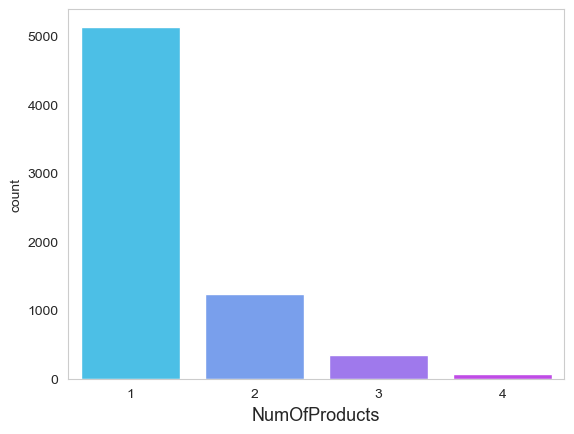

In [86]:
# Number of products used
sns.countplot(x='NumOfProducts', data=dy5_0, palette='cool')

plt.grid(axis='y')
plt.xlabel('NumOfProducts', fontsize=13)
plt.show()

평균 사용 제품 수: 1.32


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\1214641126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NumOfProducts', data=dy5_0, palette='cool')


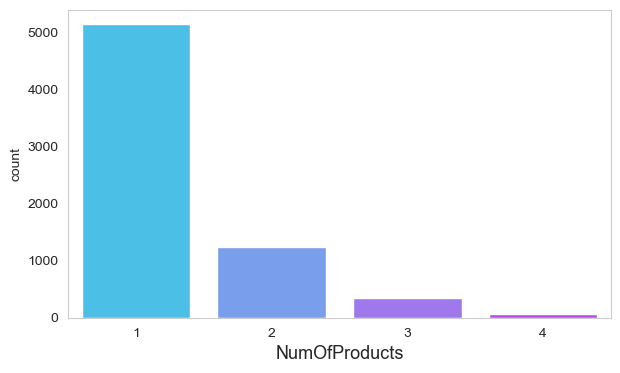

In [87]:
# Number of products used
plt.figure(figsize=(7, 4))
sns.countplot(x='NumOfProducts', data=dy5_0, palette='cool')

# Calculate and print the average number of products
mean_num_products = dy5_0['NumOfProducts'].mean()
print(f"평균 사용 제품 수: {mean_num_products:.2f}")  # 소수점 둘째 자리까지 출력

plt.grid(axis='y')
plt.xlabel('NumOfProducts', fontsize=13)
plt.show()


평균 1.3입니다.
다른 고객 세그먼트와 비교했을 때, 하나의 서비스만 사용하는 고객이 많습니다.
50대는 1.31, 50대 이탈자는 1.57입니다(이탈자만 분석).

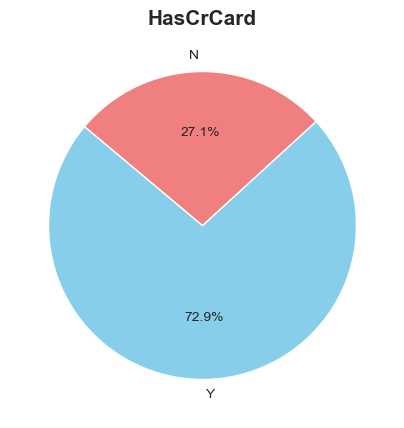

In [88]:
# Whether customers have a credit card
card_counts = dy5_0['HasCrCard'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(card_counts, labels=['Y', 'N'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('HasCrCard', fontsize=15, fontweight='bold')
plt.show()

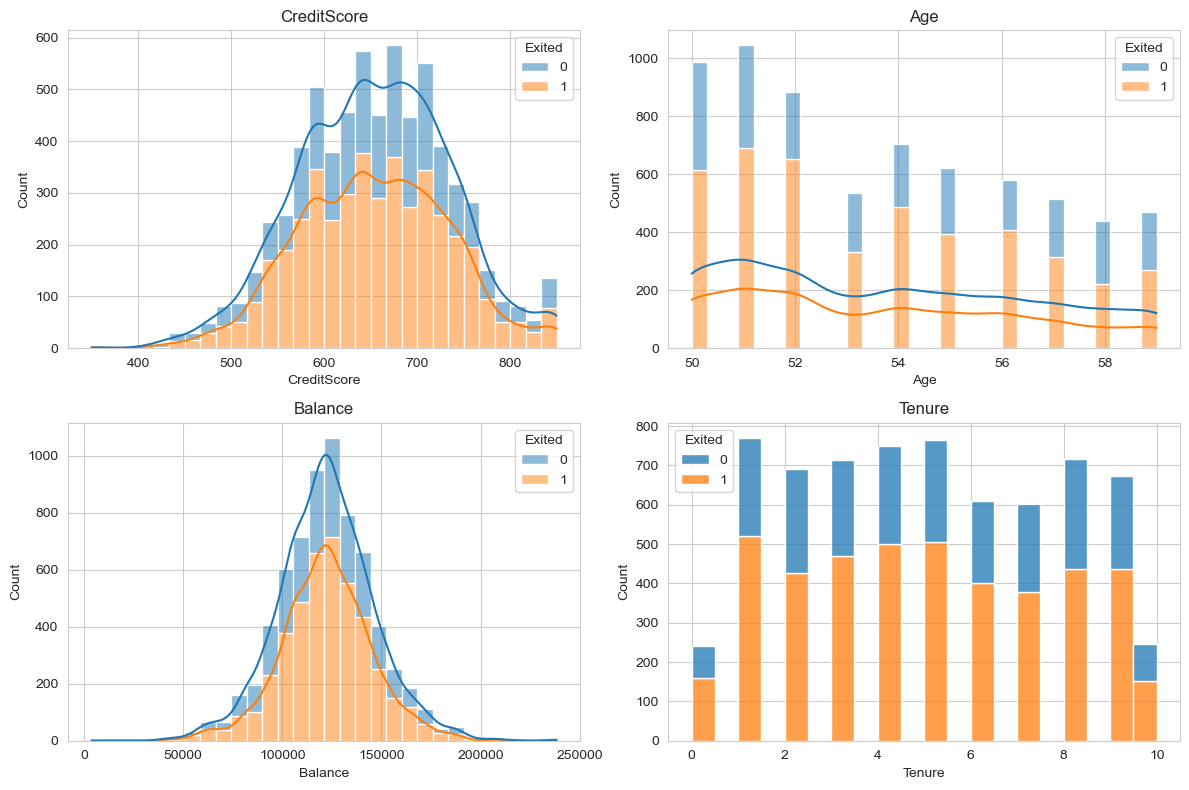

In [ ]:
# 50대 고객 중 잔액이 0이 아닌 고객들을 대상으로 CreditScore, Age, Balance, Tenure의 분포를 각각 이탈 여부(Exited)에 따라 시각화
 
data_nonzero_balance = dy5_0[dy5_0['Balance'] != 0]


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data_nonzero_balance, x='CreditScore', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('CreditScore')
plt.subplot(2, 2, 2)
sns.histplot(data_nonzero_balance, x='Age', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('Age')
plt.subplot(2, 2, 3)
sns.histplot(data_nonzero_balance, x='Balance', hue='Exited', kde=True, multiple='stack', bins=30)
plt.title('Balance')
plt.subplot(2, 2, 4)
sns.histplot(data_nonzero_balance, x='Tenure', hue='Exited', kde=False, multiple='stack', bins=20)
plt.title('Tenure')


plt.tight_layout()
plt.show()


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2984993741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y='Balance', data=dy5_0, palette="muted", split=True)


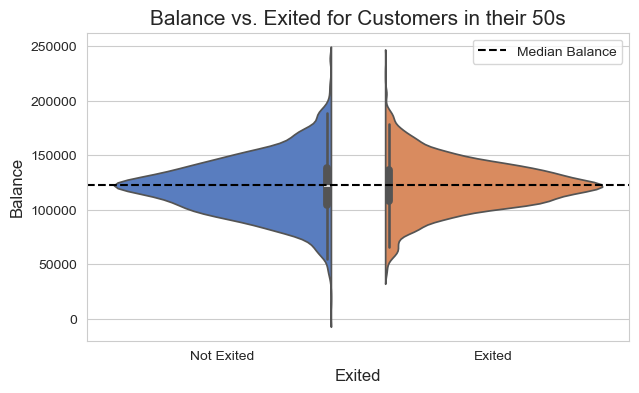

In [ ]:
# Visualize churn rate by account balance (Violin Plot) 뭔가 이상함ㄷ ㄷㄷ
plt.figure(figsize=(7, 4))
sns.violinplot(x='Exited', y='Balance', data=dy5_0, palette="muted", split=True)
plt.axhline(y=dy5_0['Balance'].median(), color='black', linestyle='--', label='Median Balance')
plt.title('Balance vs. Exited for Customers in their 50s', fontsize=15)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.legend()
plt.show()

In [ ]:
# Create a derivative variable Balance 변수를 기반으로 파생 변수를 생성하려고 하며, 그 결과는 BalLevel이라는 변수로 Low, Mid, High로 나누어집니다.
 # Derivative variable based on balance
import numpy as np
count1, bin_dividers1 = np.histogram(dy5['Balance'], bins=3)
a1 = np.linspace(dy5['Balance'].min(), dy5['Balance'].max(), 4) 

dy5['BalLevel'] = pd.cut(dy5['Balance'], bins = bin_dividers1, include_lowest=True, labels=['Low','Mid', 'High'])
dy5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6782 entries, 18 to 165026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      6782 non-null   int64   
 1   Gender           6782 non-null   object  
 2   Age              6782 non-null   float64 
 3   Tenure           6782 non-null   int64   
 4   Balance          6782 non-null   float64 
 5   NumOfProducts    6782 non-null   int64   
 6   HasCrCard        6782 non-null   float64 
 7   IsActiveMember   6782 non-null   float64 
 8   EstimatedSalary  6782 non-null   float64 
 9   Exited           6782 non-null   int64   
 10  BalLevel         6782 non-null   category
dtypes: category(1), float64(5), int64(4), object(1)
memory usage: 589.6+ KB


C:\Users\09048\AppData\Local\Temp\ipykernel_9528\3501118100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dy5['BalLevel'] = pd.cut(dy5['Balance'], bins = bin_dividers1, include_lowest=True, labels=['Low','Mid', 'High'])


- 연속형 독립변수에 대한 t-검정을, 범주형 독립변수에 대한 카이-제곱 검정을 수행했습니다.

표본 t-검정 : 각 집단의 종속변수 빈도 분석 결과, 큰 정도의 차이가 나타나 t-검정에 영향을 미칩니다.
표본 추출


"Exited" 열의 값이 0, 1인 두 모집단에서 CreditScore 대 Balance의 차이를 검정합니다.
"Balance" 열의 값 0을 제거합니다.
2표본 t-검정을 사용하여 검정합니다. ɑ=0.05


가설
H0: "Exited" 집단 간 종속변수의 평균은 동일합니다.
H1: "Exited" 집단 간 종속변수의 평균은 다릅니다.

In [93]:
train_data = train[:]
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)
df_0=nonzero.loc[nonzero['Exited']==0,['CreditScore','Age','Tenure','Balance']].reset_index()
df_1=nonzero.loc[nonzero['Exited']==1,['CreditScore','Age','Tenure','Balance']].reset_index()

**df_0**에는 잔액이 0이 아닌 이탈하지 않은 고객들의 CreditScore, Age, Tenure, Balance 정보가 포함됩니다.

**df_1**에는 잔액이 0이 아닌 이탈한 고객들의 CreditScore, Age, Tenure, Balance 정보가 포함됩니다.

In [97]:
# CreditScore
"""독립 표본 t-검정을 수행하여 두 샘플, 
즉 df_0 (이탈하지 않은 고객들의 CreditScore)와 df_1 (이탈한 고객들의 CreditScore) 간의 
평균 차이가 통계적으로 유의미한지 여부를 확인
"""

import scipy.stats as stats

# 변수 목록
variables = ['CreditScore', 'Age', 'Tenure', 'Balance']

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 t-검정 수행
for var in variables:
    df_0_var = df_0[var]
    df_1_var = df_1[var]
    
    # t-검정 수행
    t, p = stats.ttest_ind(df_0_var, df_1_var)
    
    # 결과 분석
    if p < 0.05:
        result = f"Reject H0: There is a statistically significant difference between the two samples."
    else:
        result = f"Adopt H0: There is no statistically significant difference between the two samples."
    
    # 결과 저장
    results.append((var, result, round(p, 5)))

# 결과 출력
for var, result, p_val in results:
    print(f"Variable: {var} | {result} (p-value: {p_val})")


Variable: CreditScore | Reject H0: There is a statistically significant difference between the two samples. (p-value: 0.0)
Variable: Age | Reject H0: There is a statistically significant difference between the two samples. (p-value: 0.0)
Variable: Tenure | Reject H0: There is a statistically significant difference between the two samples. (p-value: 0.0)
Variable: Balance | Adopt H0: There is no statistically significant difference between the two samples. (p-value: 0.06745)


이탈한 고객과 이탈하지 않은 고객의 CreditScore 간에 통계적으로 매우 유의미한 차이가 존재합니다.

p 값이 0.0이기 때문에, 두 그룹 간의 차이는 매우 확실하고 우연에 의한 것이 아니라 실제로 존재하는 차이라고 볼 수 있습니다.

50대 2표본 t-검정
이탈률이 가장 높은 50대를 대상으로 이탈 집단을 심층 분석함
균형이 0인 값은 제외함
표본 수가 이전 실험보다 적으므로 추가 표본 추출은 없음
실험은 50대를 대상으로 진행되었으므로 연령 정보가 포함되므로 연령은 분석하지 않음
가설 0: 이탈 집단 간 종속변수의 평균은 동일함
가설 1: 이탈 집단은 종속변수의 평균이 다름

In [99]:
"""
데이터에서 50대 고객들의 신용 점수(CreditScore), 근속 기간(Tenure), 잔액(Balance)을 추출하여, 
이탈하지 않은 고객(Exited == 0)과 이탈한 고객(Exited == 1)으로 나누기기"""

def categorize_age(age):
    if age<20:
        return '10s'
    elif age<30:
        return '20s'
    elif age<40:
        return '30s'
    elif age<50:
        return '40s'
    elif age<60:
        return '50s'
    elif age<70:
        return '60s'
    else:
        return '70+'

train_data['Age_range']=train_data['Age'].apply(categorize_age)
nonzero=train_data[train_data['Balance']!=0].reset_index(drop=True)
df_0_50s=nonzero.loc[(nonzero['Exited']==0)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)
df_1_50s=nonzero.loc[(nonzero['Exited']==1)&(nonzero['Age_range']=='50s'),['CreditScore','Tenure','Balance']].reset_index(drop=True)

C:\Users\09048\AppData\Local\Temp\ipykernel_9528\2278330802.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age_range']=train_data['Age'].apply(categorize_age)


In [100]:
# Variables to test
variables = ['CreditScore', 'Tenure', 'Balance']

# Perform t-test for each variable
for var in variables:
    t, p = stats.ttest_ind(df_0_50s[var], df_1_50s[var])  # T-test for each variable
    print(f"Variable: {var}")
    if p < 0.05:
        print(f"Reject H0: There is a statistically significant difference between the two samples.")
    else:
        print(f"Adopt H0: There is no statistically significant difference between the two samples.")
    print(f"p-value: {round(p, 5)}\n")


Variable: CreditScore
Adopt H0: There is no statistically significant difference between the two samples.
p-value: 0.4056

Variable: Tenure
Adopt H0: There is no statistically significant difference between the two samples.
p-value: 0.06549

Variable: Balance
Adopt H0: There is no statistically significant difference between the two samples.
p-value: 0.30545



결론¶
전반적으로, 잔액(Balance)을 제외하고 신용점수(CreditScore), 연령(Age), 그리고 재직 기간(Tenure)에서 통계적으로 유의미한 차이가 발견되었습니다. 그러나 이탈률이 가장 높은 연령대인 50대에 대한 심층 분석 결과, 50대만 놓고 볼 때 신용점수(CreditScore), 재직 기간(Tenure), 그리고 잔액(Balance) 간에 유의미한 차이가 없었습니다. 따라서 50대의 이탈 여부를 결정하는 다른 변수나 외부 요인이 있을 가능성이 높습니다.

3.2 카이제곱 검정¶
이 검정은 두 범주형 변수 사이에 관계가 있는지 확인하기 위해 수행됩니다.
또한 Balance 변수를 BalLevel 변수로 나누어 t-검정에서 관련성이 없는 것으로 나타난 연속형 변수에서 파생 변수를 생성했을 때 결과에 ​​변화가 있는지 확인했습니다.
이 데이터의 범주형 변수 목록은 다음과 같습니다. HasCrCard, IsActiveMember, Gender, BalLevel, Exited

H0(귀무가설): 두 범주형 변수는 서로 독립적입니다.

H1(대립가설): 두 범주형 변수는 서로 독립적이 아닙니다.

In [ ]:
# Preprocessing
# One-hot Encoding 
"""원-핫 인코딩 (One-hot Encoding) 을 사용하여 범주형 변수인 Gender와 BalLevel을 수치형 변수로 변환
신용카드와 활성 회원은 이미 이분형 범주형 변수이므로 원핫 인코딩을 수행하지 않습니다."""
dy5_dm = pd.get_dummies(dy5, columns = ['Gender','BalLevel'], drop_first=True)

In [102]:
# Scaling : 카이제곱검정할때는 필수는 아님 아마 데이터 전처리하려고 적용한듯듯
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dy5_dm)
dy5_dm_sc = scaler.transform(dy5_dm)

dy5_dm_sc = pd.DataFrame(dy5_dm_sc)
dy5_dm_sc     
 
dy5_dm_sc.columns = dy5_dm.columns

In [103]:
dy5_dm_sc.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'BalLevel_Mid', 'BalLevel_High'],
      dtype='object')

In [104]:
# 카이제곱 검정을 사용하여 여러 변수와 Exited 간의 독립성을 테스트

col = ['HasCrCard', 'IsActiveMember', 'Gender_Male','BalLevel_Mid', 'BalLevel_High']
for i in col: 
    cross_data = pd.crosstab(index = dy5_dm_sc['Exited'], columns = dy5_dm_sc[i], 
                             margins=False)

    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(cross_data)
    msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
    print(f'<Exited and {i}>')
    print(msg.format(chi2, p, dof))
    if p < 0.05:
        print('dependent')
    else:
        print('independent')
    # print(expected)
    print('---------------------------')

<Exited and HasCrCard>
Test Statistic: 3.512031760205843
p-value: 0.06092469740333798
Degree of Freedom: 1
independent
---------------------------
<Exited and IsActiveMember>
Test Statistic: 1120.6478183974805
p-value: 1.0745755752999843e-245
Degree of Freedom: 1
dependent
---------------------------
<Exited and Gender_Male>
Test Statistic: 125.66086885425042
p-value: 3.647868576993693e-29
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_Mid>
Test Statistic: 16.26985373334803
p-value: 5.4930970109188514e-05
Degree of Freedom: 1
dependent
---------------------------
<Exited and BalLevel_High>
Test Statistic: 6.7278503581130025
p-value: 0.00949189234529965
Degree of Freedom: 1
dependent
---------------------------


다음 범주형 변수는 카이제곱 분석을 기반으로 Exited 변수와 관련이 있는 것으로 확인되었습니다.
IsActiveMember, Gender_Male, BalLevel
특히, Balance를 연속형 변수로 사용한 t-검정 결과는 Balance를 구간이 있는 범주형 변수로 사용한 교차 분석 결과와 달랐습니다.

결과 해석
Exited와 HasCrCard (신용카드 보유 여부)

Test Statistic (카이제곱 통계량): 3.51

p-value: 0.061 (0.05보다 큼)

Degree of Freedom: 1

해석: p-value가 0.05보다 크므로, **귀무 가설(H0)**을 기각하지 않고, Exited와 HasCrCard는 독립적인 관계를 가진다고 결론을 내릴 수 있습니다. 즉, 신용카드 보유 여부가 탈퇴 여부에 큰 영향을 미치지 않는다고 할 수 있습니다.

Exited와 IsActiveMember (활성 회원 여부)

Test Statistic (카이제곱 통계량): 1120.65

p-value: 매우 작은 값 (1.07e-245)

Degree of Freedom: 1

해석: p-value가 매우 작으므로, **귀무 가설(H0)**을 기각하고, Exited와 IsActiveMember는 종속적인 관계를 가진다고 할 수 있습니다. 즉, 활성 회원 여부는 탈퇴 여부와 강하게 연관되어 있습니다. 실제로 활성 회원이 아니면 탈퇴할 확률이 더 높다는 것을 시사합니다.

Exited와 Gender_Male (성별)

Test Statistic (카이제곱 통계량): 125.66

p-value: 매우 작은 값 (3.65e-29)

Degree of Freedom: 1

해석: p-value가 매우 작으므로, **귀무 가설(H0)**을 기각하고, Exited와 Gender_Male은 종속적인 관계를 가진다고 할 수 있습니다. 즉, 성별이 탈퇴 여부에 영향을 미친다는 결과입니다. 남성 고객이 탈퇴할 확률이 더 높을 수도 있습니다.

Exited와 BalLevel_Mid (중간 수준의 잔액)

Test Statistic (카이제곱 통계량): 16.27

p-value: 0.0000549 (0.05보다 작음)

Degree of Freedom: 1

해석: p-value가 0.05보다 작으므로, **귀무 가설(H0)**을 기각하고, Exited와 BalLevel_Mid는 종속적인 관계를 가진다고 할 수 있습니다. 즉, 잔액 수준이 중간인 고객의 탈퇴 여부와 강한 연관이 있음을 나타냅니다. 중간 수준의 잔액을 가진 고객들이 탈퇴할 확률이 높을 수 있습니다.

Exited와 BalLevel_High (높은 수준의 잔액)

Test Statistic (카이제곱 통계량): ...

p-value: 0.009 (0.05보다 작음)

Degree of Freedom: 1

해석: p-value가 0.05보다 작으므로, **귀무 가설(H0)**을 기각하고, Exited와 BalLevel_High는 종속적인 관계를 가진다고 할 수 있습니다. 즉, 잔액 수준이 높은 고객들도 탈퇴 여부와 관계가 있다는 결과입니다. 높은 잔액을 가진 고객들이 탈퇴할 확률이 다른 수준의 잔액을 가진 고객들보다 높을 수 있습니다.

회귀 분석 ¶
앞서 진행된 가설 검정 단계에서는 각 변수가 50대 고객의 이탈에 유의미한 영향을 미치지 않는 것으로 확인되었습니다.
학습한 내용을 적용하기 위한 회귀 분석을 수행하기 위해 '제품 수'라는 새로운 연속형 종속변수를 설정했습니다.
주요 관심 대상인 '이탈'은 범주형 변수이므로 카이제곱 검정과 같은 다른 검정 방법을 사용해야 함을 강조합니다.

In [105]:
# Regression on NumOfProducts


X1 = dy5_dm_sc[['Age', 'BalLevel_Mid','BalLevel_High',
               'Tenure', 'CreditScore']]
y = dy5_dm_sc['NumOfProducts']

In [106]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['variable'] = X1.columns
print(vif)

   VIF Factor       variable
0    2.570811            Age
1    9.666977   BalLevel_Mid
2    1.620981  BalLevel_High
3    3.720647         Tenure
4    9.466688    CreditScore


**다중공선성(Multicollinearity)**을 확인하는 작업을 위한 것입니다. 다중공선성이란, 독립 변수들 간에 서로 높은 상관관계가 있는 경우, 회귀 분석에서 문제가 발생할 수 있다는 것입니다. 이를 **VIF (Variance Inflation Factor)**를 사용하여 확인

In [ ]:
# 선형회귀분석 OLS
 
import statsmodels.api as sm

X1_ad = sm.add_constant(X1)
model = sm.OLS(y, X1_ad).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          NumOfProducts   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.133
Date:                Mon, 14 Apr 2025   Prob (F-statistic):              0.340
Time:                        17:44:09   Log-Likelihood:                 1086.0
No. Observations:                6782   AIC:                            -2160.
Df Residuals:                    6776   BIC:                            -2119.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1099      0.016      7.040

5. 결론¶
상관관계 시각화 과정에서 각 변수 간의 상관계수는 매우 낮았습니다.
t-검정 결과, 특정 연속형 변수는 50대의 이탈에 유의미한 영향을 미치지 않는 것으로 나타났습니다.
교차분석 결과, 일부 범주형 변수가 영향을 미치는 것으로 나타났습니다.
회귀 분석을 위해 새로운 연속형 종속변수인 '상품 수'를 생성했지만, 모형이 통계적으로 유의미하지 않아 각 변수 간의 관계를 설명하기 어려웠습니다.
은행들은 현재 많은 고객 이탈로 인해 신뢰도 하락과 매출 감소를 겪고 있습니다. 또한, 활성 고객 부족으로 인한 신제품 및 이벤트 성공 가능성 감소는 은행의 장기적인 성장 전략에 상당한 영향을 미칠 수 있습니다. 특히, 다른 고객보다 잔액과 평균 연봉이 높은 경향이 있는 50대 이상 고객의 이탈은 은행의 자금 조달 감소와 경쟁력 약화로 이어질 수 있습니다.

솔루션은 다음과 같습니다.

국가별 마케팅

예: 독일 고객에게 맥주 구매 시 현금 환급 제공
기대 효과: 고객 참여 유도, 브랜드 충성도 향상, 경쟁사 대비 우호적인 인식 구축

지역 특색 활용

지역 사회와 협력하여 축제 개최
기대 결과: 고객 참여 유도, 브랜드 이미지 강화, 고객 충성도 및 장기적인 관계 구축
저잔액 고객에게 저렴하고 편리한 금융 서비스 제공

잔액이 적은 고객의 높은 이탈률로 인한 재정적 부담 최소화
기대 효과: 재정적 부담 감소, 은행 서비스 접근성 향상, 신규 고객 유치

예금 금리가 높은 상품 출시

잔액에 관계없이 예금 금리가 높은 상품을 출시하여 고객 이탈률 감소, 고객 유지율 향상, 신규 고객 유치
기대 효과: 고객 이탈률 감소, 고객 유지율 향상, 경쟁 은행 대비 우위 확보
은퇴 및 연금 관리 컨설팅 제공

50대 이상 고객층을 위한 맞춤형 서비스를 제공하여 이탈률이 높은 50대 고객의 이탈을 줄이고 신규 회원을 유치합니다.
기대 효과: 고객의 재정 불안 감소, 신뢰 구축, 고객 충성도 및 은행 신뢰도 향상
6. 프로젝트 평가
실망스러운 점

초기에는 데이터 분석 방향과 계획을 수립하지 않아 다양한 변수를 분석하고 검증하는 데 많은 시간이 소요되었습니다.

이탈률이 높은 고객 50명을 선정하여 분석했지만, 유의미한 변수를 찾지 못하고 이탈률에만 지나치게 집중한 점이 아쉽습니다.

교훈

팀원들과의 협업 및 소통을 통해 프로젝트를 해결하는 과정이 좋았고, 배운 내용을 되짚어보고 이해하는 데 큰 도움이 되었습니다.

작은 프로젝트였지만, 이러한 경험을 할 수 있어서 좋았고, 향후 프로젝트에도 도움이 될 것입니다.